## Image Operations 

Section Goals:
1. Learn various image processing operations
2. Perform image operation like smoothing, blurring, Morphological operations
3. Grab properties like color space and histograms.

## Color Space/Map

We know RGB color space model, HSL (hue,saturation,light) and HSV (hue, saturation, value) are the newer alternate color space models developed in 1970. 

HSL and HSV models precieves color more algined with human vision.

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread("../dataset/img/dog-backpack.jpg")
img.shape

(1200, 1200, 3)

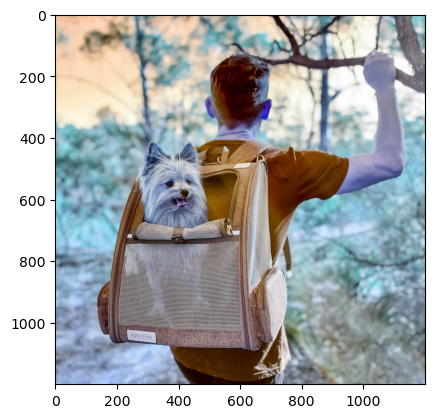

In [10]:
plt.imshow(img)
plt.show()
# cv2 reads image as BGR

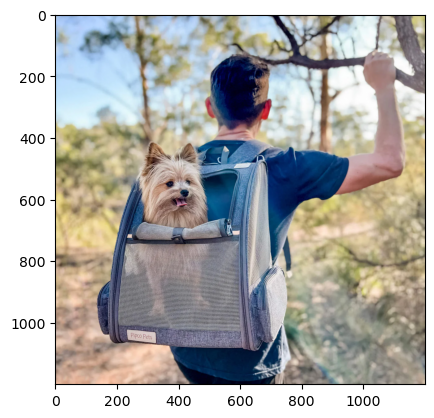

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

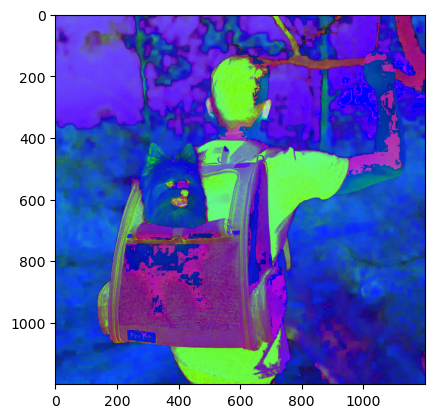

In [12]:
# Converting a RGB image to HSV
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
plt.show()

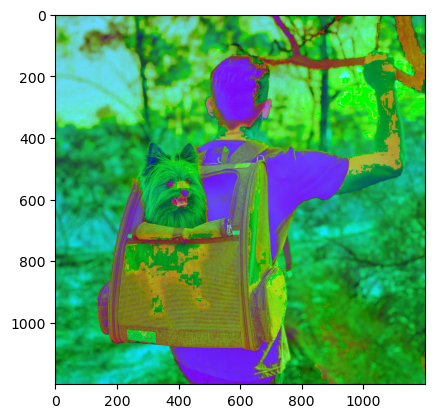

In [13]:
# Converting a RGB image to HSL
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
plt.show()

## Blending and Pasting Image

OpenCV has many programmatic methods of blending images together and pasting images on top of each other.


### Blending Images

Blending Images: addWeighted() --> takes two images and combines them. 

Formula: new_pixel = (alpha * pixel_1) + (beta * pixel_2) + gamma.

Note: Alpha and Beta values are determined by the user. If Alpha > Beta, image 1 is stronger, else image 2 is stronger.                          Gamma -> used to manipulate image more (optional).

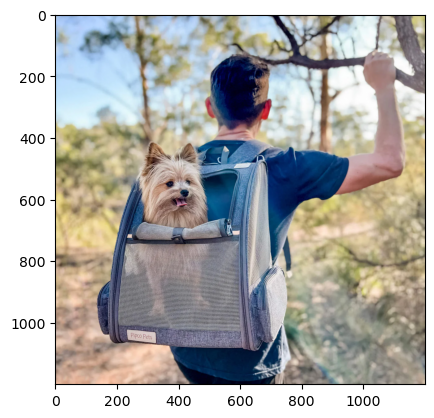

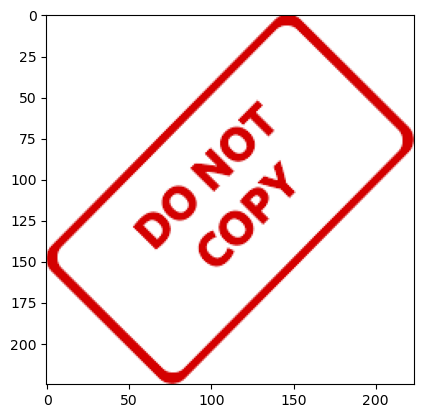

In [14]:
# we are going use the above "img" variable as image1, which holds the dog backpack image in RBG.
img1 = img.copy()
img2 = cv2.imread('../dataset/img/watermark_no_copy.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Image 1
plt.imshow(img1)
plt.show()
# Image 2
plt.imshow(img2)
plt.show()

In [15]:
print("image-1 shape : ", img1.shape)
print("image-2 shape : ", img2.shape)

image-1 shape :  (1200, 1200, 3)
image-2 shape :  (225, 224, 3)


In [32]:
# Two images size were vastly different, we need to resize the image to directly paste on top of eachother and blending as well.

# addWeighted methods works well with the images of almost same size.

# Firstly, lets see how the blending images on size works, 
# To do that we need to resize the both images as same size.

# regarding the image-1, its already which shape of (1200,1200)
img2 = cv2.resize(img2, (1200,1200))
img2.shape

(1200, 1200, 3)

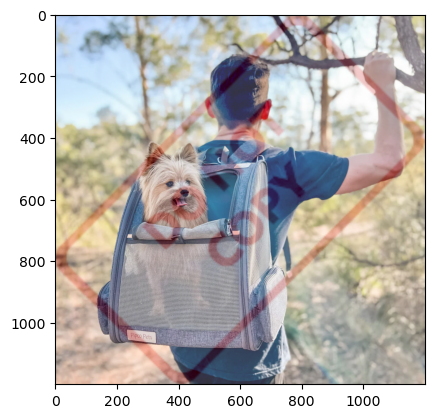

In [17]:
# if : aplha > beta, image 1 is stronger
# else : image 2 is stronger
blended = cv2.addWeighted(src1 = img1, alpha = 0.8, src2 = img2, beta = 0.2, gamma = 0)
plt.imshow(blended)
plt.show()

In [33]:
# OVERLAY a Small image on top of a larger image (NO BLENDING) -> Numpy reassignment

# As for larger image, we will take img1 with shape (1200, 1200)
large_img = img1.copy()
# for Smaller image, we will take img2
small_img = cv2.imread('../dataset/img/watermark_no_copy.jpg')
small_img = cv2.resize(small_img, (362,360))
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)

print("larger image shape : ", large_img.shape)
print("Smaller image shape : ", small_img.shape)

larger image shape :  (1200, 1200, 3)
Smaller image shape :  (360, 362, 3)


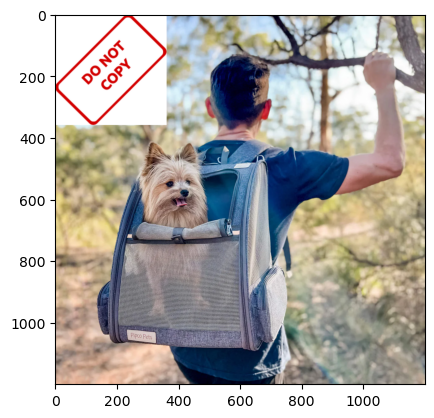

In [34]:
# As we did drawing shapes on images, similarily we need you use that way to overlay a image on top other image.

# Image starting coordinates
x_start , y_start = 0, 0
# Image ending coordinates will be addtion of x_start and image length and y_start and image height.
x_end = x_start + small_img.shape[1]
y_end = y_start + small_img.shape[0]

# OVERLAY
large_img[y_start:y_end, x_start:x_end] = small_img
plt.imshow(large_img)
plt.show()

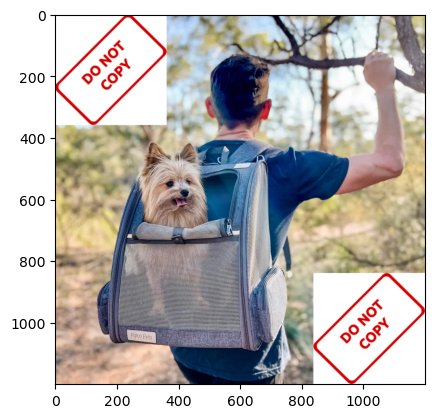

In [35]:
# Overlay on Bottom right Corner
x_start = large_img.shape[1] - small_img.shape[1]  # 840 
y_start = large_img.shape[0] - small_img.shape[0]  # 838
large_img [y_start:1200 , x_start:1200] = small_img
plt.imshow(large_img)
plt.show()

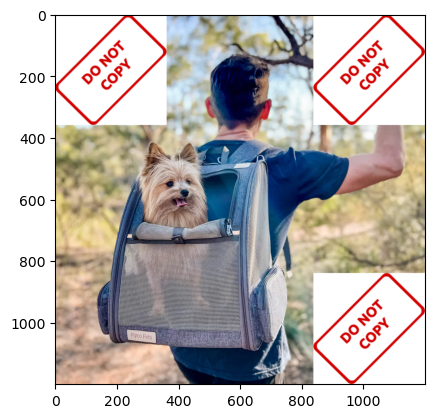

In [36]:
# Overlay on Top Right Corner
x_start = large_img.shape[1] - small_img.shape[1] # 840
y_start = 0

x_end = large_img.shape[1]
y_end = small_img.shape[0]

large_img[ y_start:y_end, x_start:x_end ] = small_img
plt.imshow(large_img)
plt.show()

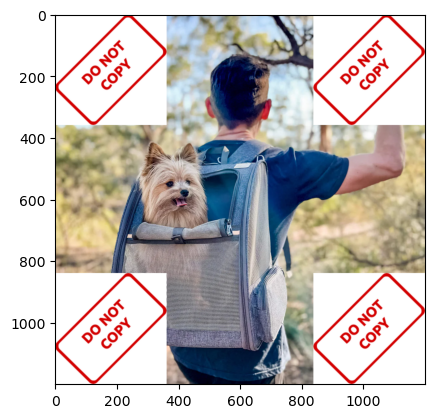

In [37]:
# Overlay on the bottom left corner
x_start = 0
y_start = large_img.shape[0] - small_img.shape[0] # 838

x_end = small_img.shape[1]
y_end = large_img.shape[0]
large_img[ y_start:y_end, x_start:x_end] = small_img
plt.imshow(large_img)
plt.show()

### Pasting Images through Masking

In [38]:
# Blending Images together with different size
img1 = img.copy()
img2 = cv2.imread('../dataset/img/watermark_no_copy.jpg')
img2 = cv2.resize(img2, (362,360))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

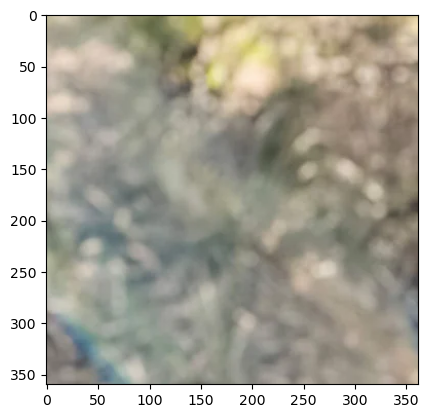

In [39]:
# we will take the region of interest where I am going to blend/paste an image into an image
# Here my roi will be the bottom corner
x_start = img1.shape[1] - img2.shape[1]
y_start = img1.shape[0] - img2.shape[0]
roi = img1[y_start:img1.shape[0] , x_start:img1.shape[1] ]
plt.imshow(roi)
plt.show()

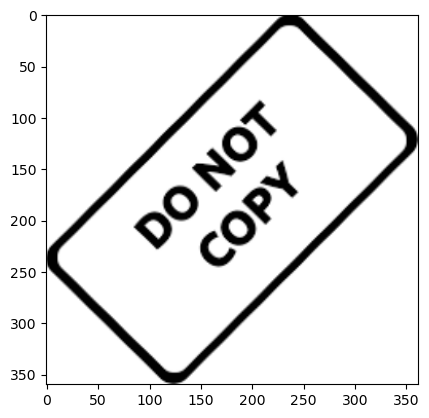

In [51]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')
plt.show()

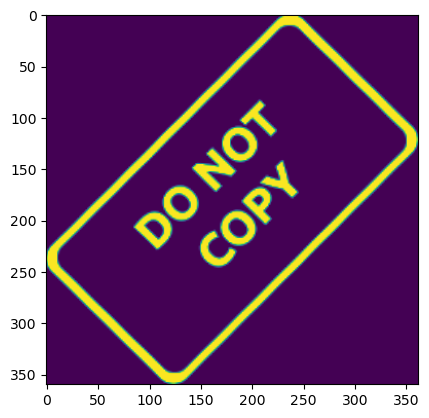

In [61]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv)
plt.show()

In [62]:
mask_inv.shape

(360, 362)

In [63]:
# The inversed mask doesn't have the colour dimension using white board masking we will add it
import numpy as np
white_board = np.full(img2.shape, 255, np.uint8)
white_board.shape

(360, 362, 3)

background shape (after color channels added) :  (360, 362, 3) 



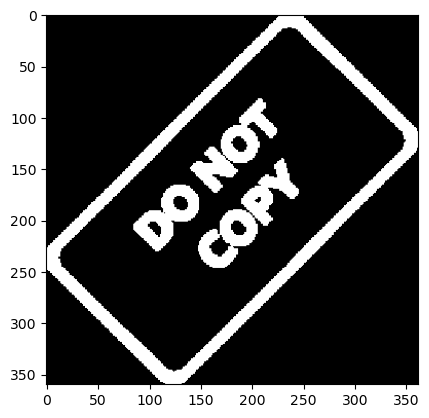

In [72]:
background = cv2.bitwise_or(white_board, white_board, mask = mask_inv)
print("background shape (after color channels added) : ", background.shape, "\n")
plt.imshow(background)
plt.show()

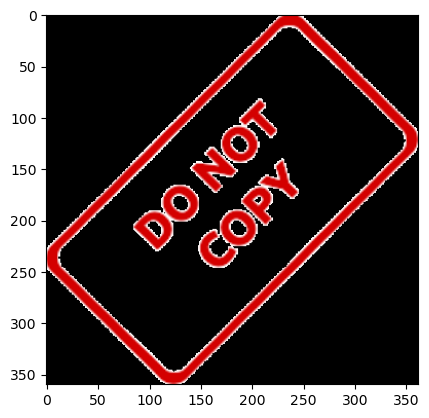

In [73]:
foreground  = cv2.bitwise_or(img2, img2, mask = mask_inv)
plt.imshow(foreground)
plt.show()

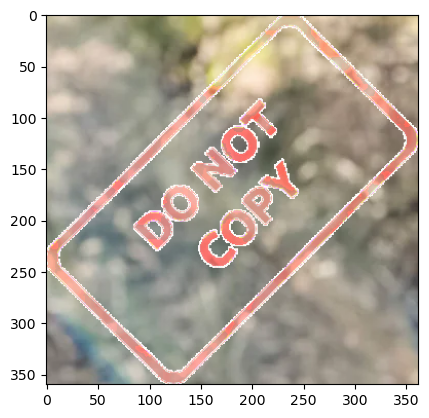

In [74]:
final_roi = cv2.bitwise_or(roi, foreground)
plt.imshow(final_roi)
plt.show()

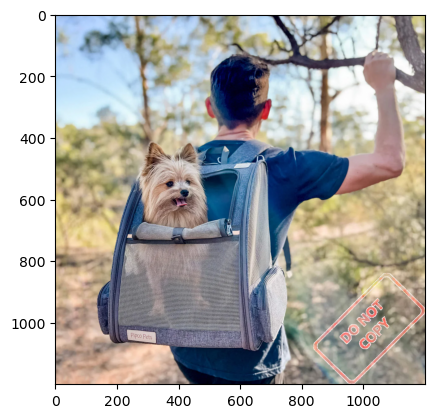

In [75]:
# Overlay the final roi in the image 1
img1[y_start:img1.shape[0] , x_start:img1.shape[1] ] = final_roi
plt.imshow(img1)
plt.show()